# <center>MDS6212 Fintech Theory and Practice: Week 5 Assignment<center>

----
    
**220041006 *Yihang Li***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questions-1:" data-toc-modified-id="Questions-1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Questions 1:</a></span><ul class="toc-item"><li><span><a href="#Google-Trends" data-toc-modified-id="Google-Trends-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Google Trends</a></span></li><li><span><a href="#Related-queries" data-toc-modified-id="Related-queries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Related queries</a></span></li><li><span><a href="#Interest-over-Time¶" data-toc-modified-id="Interest-over-Time¶-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interest over Time¶</a></span></li></ul></li><li><span><a href="#Questions-2:" data-toc-modified-id="Questions-2:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Questions 2:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Question-3:" data-toc-modified-id="Question-3:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3:</a></span></li></ul></div>

[Reference](https://datapane.com/blog/2020/09/01/building-google-trends-report-using-python/)

## Questions 1:
   using [Google Trends](https://trends.google.com/trends/?geo=US), construct a weekly index to capture political relations between U.S. and China from the US perspective, draw the variable in a graph, and discuss its time-series variation

[Timeline-U.S. Relations With China](https://www.cfr.org/timeline/us-relations-china)

Note: the index in google trends is already weekly

In [1]:
!datapane login --server=https://datapane.com/ --token=<d95b6dc19091f789ac6af9a7026844a49c7b68c5>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `datapane login --server=https://datapane.com/ --token=<d95b6dc19091f789ac6af9a7026844a49c7b68c5>'


In [2]:
import pandas as pd
from pytrends.request import TrendReq
import altair as alt
import plotly.express as px

### Google Trends
    use pytrends for automating downloading of reports from Google Trends.

**Here we take the keyword 'Trade War' as an example**

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = 'Trade War'
pytrends.build_payload([keyword], cat=0, timeframe='today 5-y', geo='', gprop='')

### Related queries

In [4]:
top_queries = pytrends.related_queries()[keyword]['top']

In [5]:
fig = px.bar(top_queries, 
      x='query',
      y='value')
fig.show()

**From the query figure above, the top 3 related queries of 'trade war' is:**
    
    'china', 'china trade war' and 'china trade' 
    
**Thus it seems reasonable to choose 'trade war' as our search index**

### Interest over Time¶

In [6]:
r_o_t = pytrends.interest_over_time().reset_index()
r_o_t.rename(columns={keyword : 'search_volume'}, inplace=True)

**We can see from the date attribute, the data is already the weekly data**

In [7]:
r_o_t.tail(6)

date  search_volume isPartial
255 2020-09-20             14     False
256 2020-09-27             12     False
257 2020-10-04             15     False
258 2020-10-11             13     False
259 2020-10-18             13     False
260 2020-10-25             13      True

In [8]:
r_o_t_plot = alt.Chart(r_o_t).encode(x='date', y='search_volume').mark_area(line=True).interactive().properties(width=700)
r_o_t_plot

alt.Chart(...)

## Questions 2:
   using [Google Trends](https://trends.google.com/trends/?geo=US), construct a weekly index to predict the outcome of the 2020 US presidential election, draw the variable in a graph, and tell us who are more likely to win the final election.

***Reference***:

[US Elections in Search 2020](https://trends.google.com/trends/story/US_cu_b4fsy3IBAADxzM_en)

[2020 Presidential & VP Debates](https://trends.google.com/trends/story/US_cu_9KcWzHQBAACW6M_en)

[Pytrend Guidlines](https://www.holisticseo.digital/python-seo/google-trends/)

In [9]:
kw_list = ['donald trump', 'joe biden']
kw_group = list(zip(*[iter(kw_list)]*1))
print(kw_group)

kw_grplist = [list(x) for x in kw_group]
print(kw_grplist)

#Since, every search term in a list of lists, 
#build_payload() method will have to check every query one by one through our for loop.
trendshow = TrendReq(hl='en-US', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m', geo='US')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe.tail()

[('donald trump',), ('joe biden',)]
[['donald trump'], ['joe biden']]


donald trump  joe biden
date                               
2020-09-27           100        100
2020-10-04            76         54
2020-10-11            41         53
2020-10-18            48         74
2020-10-25            46         67

In [10]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)

trace = [go.Scatter(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns]

data = trace
layout = go.Layout(title='Post', showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

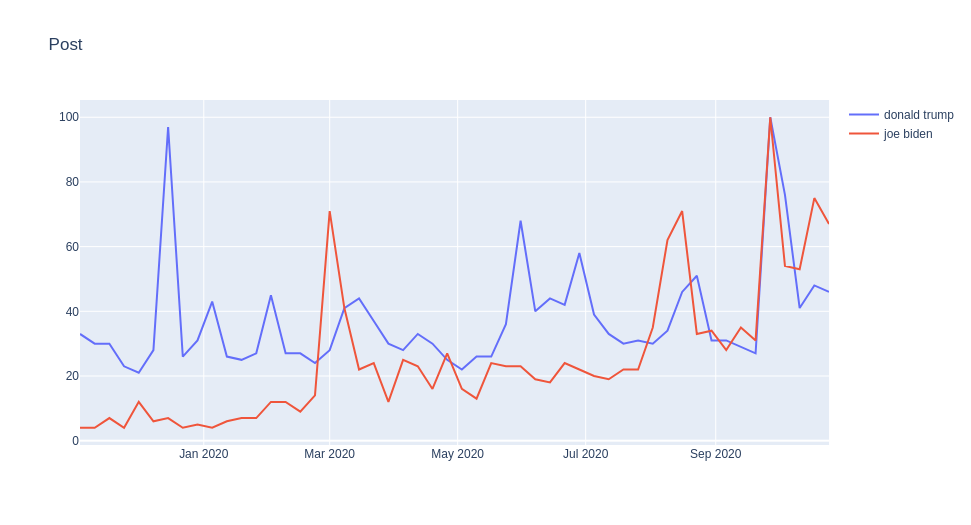

In [11]:
trace = [go.Bar(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns[0:2]]

data = trace
layout = go.Layout(title='Post', showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

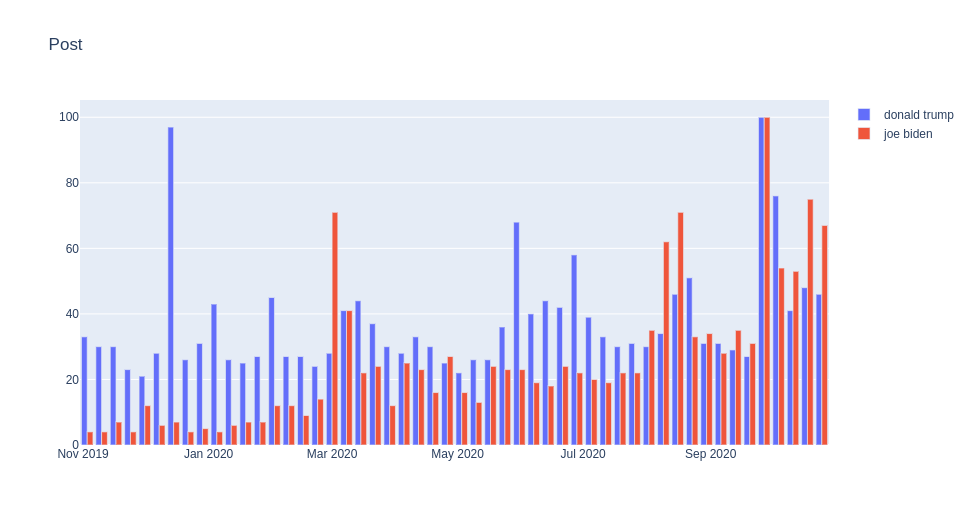

#### Conclusion

**Joe Biden is more likely to win the final election.**


## Question 3: 
   using [Baidu Index](http://index.baidu.com/), construct an index to capture investor sentiment in the Chinese market, draw the variable in a graph, and discuss its time-series variation.

**Reference:**
   
 [1]  [如何利用百度指数进行数据分析？](http://www.woshipm.com/data-analysis/449898.html)
   
 [2]  [度小满联合百度指数发布2020年一季度国民投资理财情绪指数](https://sa.sogou.com/sgsearch/sgs_tc_news.php?req=oz6ZBzbyQOlRdfGHQtbF75yx_ZraGr9WnJvT0Fph4Ac=&user_type=1)

**Here we choose the keyword '黄金', which in English means Gold, as our index to capture investor sentiment in the Chinese market**

**According to Baidu Search Index, the graph below is its search trend of Baidu user in China**

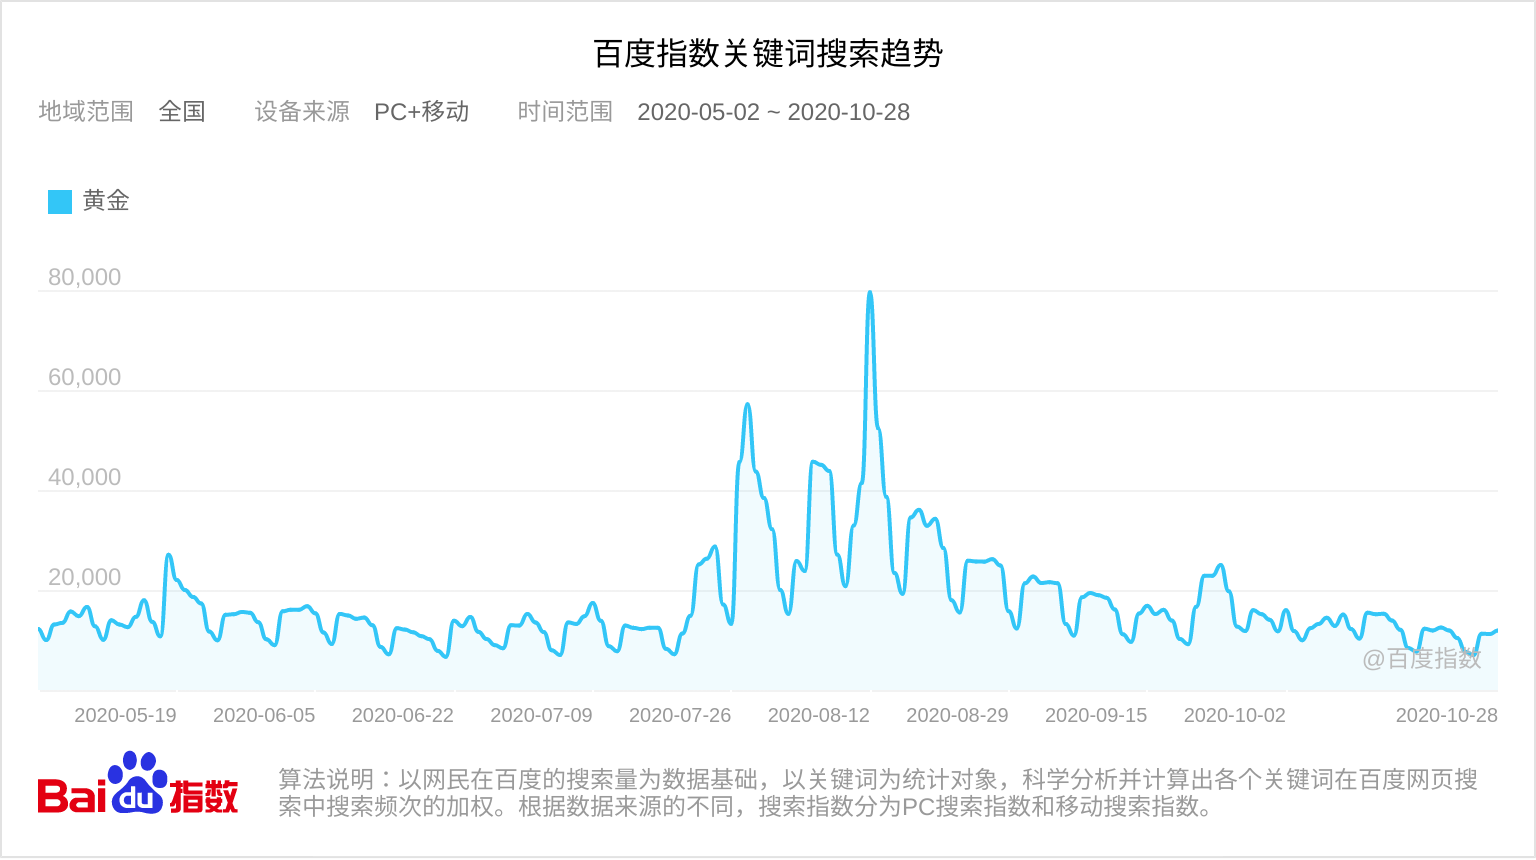

**Note:**

**1. Clearly, the time series variation of '黄金''s search trend is in certain period.**
    
**2. Besides, at the point of 2020-08-12, there is a peek search value that is much higher than any other points. By looking for the why this peek appeared, we got to know the reason is that the price of the Gold dropped sharply at that time.**

**3. Moreover, by comparing with keywords '美股' and 'a股' as follows， we can see the period is very similar. And we guess that it is due to the trade time related reason.**

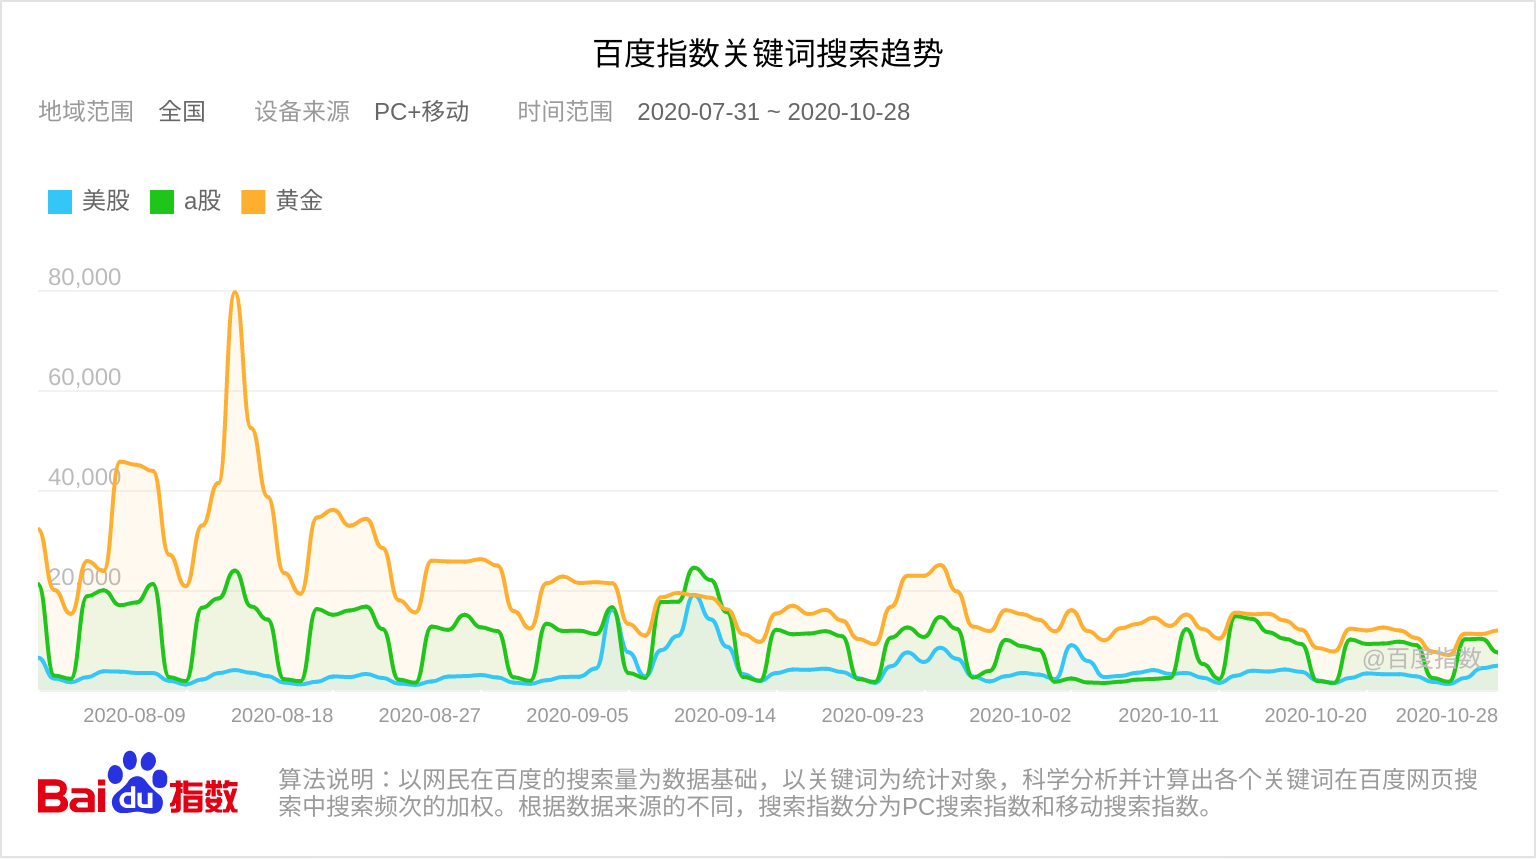